# Scikit-Learn Basics & ML Pipeline Overview

This notebook introduces scikit-learn and the machine learning pipeline without diving deep into specific algorithms.

## Learning Objectives
- Understand the ML pipeline workflow
- Learn scikit-learn setup and basic usage
- Grasp key ML concepts and terminology
- Get familiar with the scikit-learn API structure

---

## Machine Learning Pipeline Overview

A typical ML pipeline consists of the following stages:

```
┌─────────────┐    ┌──────────────┐    ┌─────────────┐    ┌────────────┐    ┌────────────┐
│ Data        │ -> │ Data         │ -> │ Feature     │ -> │ Model      │ -> │ Model      │
│ Collection  │    │ Preprocessing│    │ Engineering │    │ Training   │    │ Evaluation │
└─────────────┘    └──────────────┘    └─────────────┘    └────────────┘    └────────────┘
                          │                   │                 │                  │
                          v                   v                 v                  v
                   - Handle missing    - Create new      - Split data      - Calculate
                     values              features        - Fit model         metrics
                   - Scale/Normalize   - Transform       - Cross-validate  - Compare models
                   - Encode categories   variables       - Tune params     - Select best
```

### Pipeline Stages Explained

| Stage | Purpose | Common Tasks |
|-------|---------|--------------|
| **Data Collection** | Gather raw data from sources | Load CSV, query databases, API calls |
| **Preprocessing** | Clean and prepare data | Handle nulls, remove duplicates, fix types |
| **Feature Engineering** | Transform raw data into features | Scale values, encode categories, create interactions |
| **Model Training** | Learn patterns from data | Fit algorithm, adjust hyperparameters |
| **Model Evaluation** | Assess performance | Calculate metrics, validate generalization |

---

## Core ML Concepts

### What is Machine Learning?

Machine Learning is about **teaching computers to learn patterns from data** rather than explicitly programming rules.

**Two Main Categories:**
- **Supervised Learning**: Learn from labeled examples (input → output pairs)
  - Classification: Predict categories (spam/not spam)
  - Regression: Predict numbers (house prices)
- **Unsupervised Learning**: Find patterns in unlabeled data
  - Clustering: Group similar items
  - Dimensionality Reduction: Simplify data

### Key Terminology

| Term | Definition | Example |
|------|------------|---------|
| **Features (X)** | Input variables for prediction | House size, location, bedrooms |
| **Target (y)** | Output to predict | House price |
| **Training Set** | Data used to teach the model | 80% of your data |
| **Test Set** | Data used to evaluate the model | 20% of your data |
| **Model** | Algorithm that learns patterns | Linear Regression, Random Forest |
| **Fitting** | Training the model on data | `model.fit(X_train, y_train)` |
| **Prediction** | Using trained model on new data | `model.predict(X_test)` |
| **Overfitting** | Model memorizes training data | Works on train, fails on test |
| **Underfitting** | Model too simple to learn | Poor on both train and test |

### The Bias-Variance Tradeoff

```
Simple Model (High Bias)  ←→  Complex Model (High Variance)
     Underfitting         ←→       Overfitting
     
        GOAL: Find the sweet spot in the middle!
```

- **High Bias (Underfitting)**: Model too simple, misses patterns
- **High Variance (Overfitting)**: Model too complex, learns noise
- **Goal**: Balance complexity to generalize well to new data

In [35]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## Scikit-Learn Overview

### What is Scikit-Learn?

Scikit-learn is Python's most popular machine learning library. It provides:
- **Simple and consistent API**: All models follow the same pattern
- **Wide algorithm coverage**: Classification, regression, clustering, and more
- **Built-in preprocessing**: Scaling, encoding, feature selection
- **Model evaluation tools**: Metrics, cross-validation, train-test split

### Installation

```bash
# Using pip
pip install scikit-learn

# Using conda
conda install scikit-learn
```

### Library Components

| Module | Purpose | Key Classes |
|--------|---------|-------------|
| `sklearn.model_selection` | Split data, cross-validation | `train_test_split`, `GridSearchCV` |
| `sklearn.preprocessing` | Transform features | `StandardScaler`, `LabelEncoder` |
| `sklearn.linear_model` | Linear algorithms | `LinearRegression`, `LogisticRegression` |
| `sklearn.ensemble` | Ensemble methods | `RandomForest`, `GradientBoosting` |
| `sklearn.metrics` | Evaluate models | `accuracy_score`, `mean_squared_error` |

### The Scikit-Learn API Pattern

All scikit-learn models follow the same simple pattern:

```python
# 1. Import the model
from sklearn.linear_model import LinearRegression

# 2. Create model instance
model = LinearRegression()

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate performance
score = model.score(X_test, y_test)
```

This consistent API makes it easy to swap algorithms and compare results!

## Basic Workflow Example

Let's demonstrate the complete ML workflow with a simple example using synthetic data.

### Step 1: Generate Sample Data

We'll create a simple dataset to demonstrate the workflow. In real projects, you'd load data from CSV, databases, or APIs.

In [36]:
# Generate synthetic data for demonstration
np.random.seed(42)
n_samples = 200

# Feature: House size (in square feet)
X = np.random.uniform(500, 3500, n_samples).reshape(-1, 1)

# Target: House price (in thousands) with some noise
y = 0.15 * X.flatten() + 50 + np.random.normal(0, 30, n_samples)

# Create DataFrame for visualization
df = pd.DataFrame({
    'Size (sq ft)': X.flatten(),
    'Price ($K)': y
})

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {n_samples}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset shape: (200, 1)
Number of samples: 200

First 5 rows:
   Size (sq ft)  Price ($K)
0   1623.620357  273.142312
1   3352.142919  559.789049
2   2695.981825  463.189448
3   2295.975453  372.965775
4    968.055921  251.181624


### Step 2: Visualize the Data

Always visualize your data first to understand patterns and relationships.

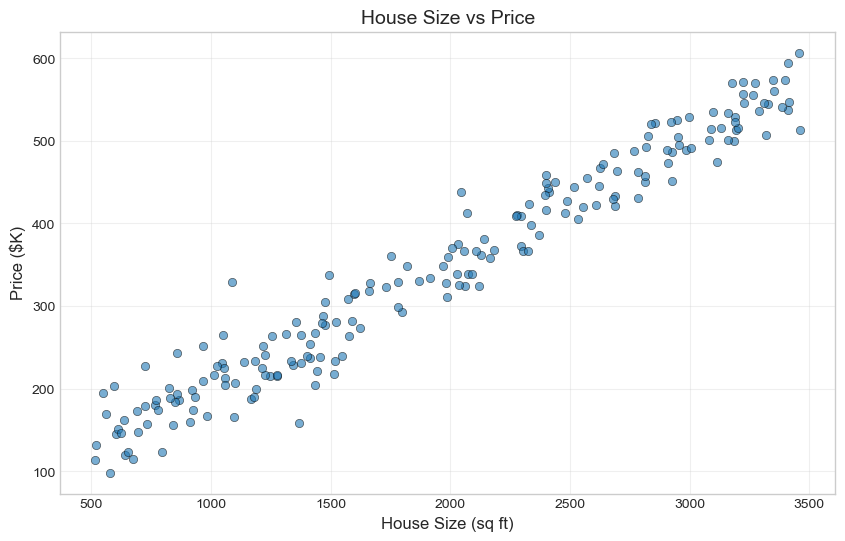

In [37]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('Price ($K)', fontsize=12)
plt.title('House Size vs Price', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

The scatter plot shows a positive linear relationship between house size and price - larger houses cost more.

### Step 3: Split Data (Train/Test)

**Critical concept**: Never test on data you trained on!

```
Full Dataset (200 samples)
    ↓
    ├─→ Training Set (160 samples, 80%) → Used to train model
    └─→ Test Set (40 samples, 20%)      → Used to evaluate model
```

This simulates real-world scenario where model encounters new, unseen data.

In [38]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"\nSplit ratio: {len(X_train)/len(X)*100:.0f}% train, {len(X_test)/len(X)*100:.0f}% test")

Training set: 160 samples
Test set: 40 samples

Split ratio: 80% train, 20% test


In [39]:
# Step 4: Create and train a model
model = LinearRegression()
model.fit(X_train, y_train)

print("✓ Model trained successfully!")
print(f"\nModel learned parameters:")
print(f"  Coefficient (slope): {model.coef_[0]:.4f}")
print(f"  Intercept: {model.intercept_:.4f}")
print(f"\nEquation: Price = {model.coef_[0]:.4f} × Size + {model.intercept_:.4f}")

✓ Model trained successfully!

Model learned parameters:
  Coefficient (slope): 0.1510
  Intercept: 49.9126

Equation: Price = 0.1510 × Size + 49.9126


In [40]:
# Step 5: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("✓ Predictions generated!")
print(f"\nExample predictions on test set (first 5):")
for i in range(5):
    print(f"  Size: {X_test[i][0]:.0f} sq ft → Predicted: ${y_pred_test[i]:.1f}K, Actual: ${y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]:.1f}K")

✓ Predictions generated!

Example predictions on test set (first 5):
  Size: 1981 sq ft → Predicted: $349.2K, Actual: $327.6K
  Size: 1050 sq ft → Predicted: $208.5K, Actual: $264.4K
  Size: 2323 sq ft → Predicted: $400.7K, Actual: $366.3K
  Size: 1213 sq ft → Predicted: $233.1K, Actual: $225.4K
  Size: 521 sq ft → Predicted: $128.6K, Actual: $131.5K


### Step 6: Evaluate Model Performance

**Common Regression Metrics:**

| Metric | Formula | Meaning | Good Values |
|--------|---------|---------|-------------|
| **MSE** | Mean(errors²) | Average squared error | Lower is better |
| **RMSE** | √MSE | Error in same units as target | Lower is better |
| **MAE** | Mean(\|errors\|) | Average absolute error | Lower is better |
| **R²** | 1 - (SS_res/SS_tot) | % of variance explained | 0 to 1, higher is better |

**Interpretation Guide:**
- **RMSE**: "On average, predictions are off by X units"
- **R²**: "Model explains X% of the variation in data"
  - R² = 1.0 → Perfect predictions
  - R² = 0.5 → Explains 50% of variation
  - R² = 0.0 → No better than predicting the mean

In [41]:
# Step 6: Evaluate the model
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Calculate and display regression metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Performance:")
    print(f"  RMSE: ${rmse:.2f}K (avg prediction error)")
    print(f"  MAE:  ${mae:.2f}K (avg absolute error)")
    print(f"  R²:   {r2:.4f} ({r2*100:.1f}% variance explained)")
    
    return {'rmse': rmse, 'mae': mae, 'r2': r2}

print("="*50)
train_metrics = evaluate_model(y_train, y_pred_train, "Training Set")
print()
test_metrics = evaluate_model(y_test, y_pred_test, "Test Set")
print("="*50)

# Check for overfitting
print(f"\n✓ Model Diagnosis:")
r2_diff = train_metrics['r2'] - test_metrics['r2']
if r2_diff < 0.05:
    print(f"  Good generalization (R² difference: {r2_diff:.3f})")
elif r2_diff < 0.10:
    print(f"  Slight overfitting (R² difference: {r2_diff:.3f})")
else:
    print(f"  ⚠️  Overfitting detected (R² difference: {r2_diff:.3f})")

Training Set Performance:
  RMSE: $28.46K (avg prediction error)
  MAE:  $22.50K (avg absolute error)
  R²:   0.9564 (95.6% variance explained)

Test Set Performance:
  RMSE: $31.24K (avg prediction error)
  MAE:  $25.16K (avg absolute error)
  R²:   0.9413 (94.1% variance explained)

✓ Model Diagnosis:
  Good generalization (R² difference: 0.015)


### Step 7: Visualize Results

Visual inspection helps validate model performance and identify issues.

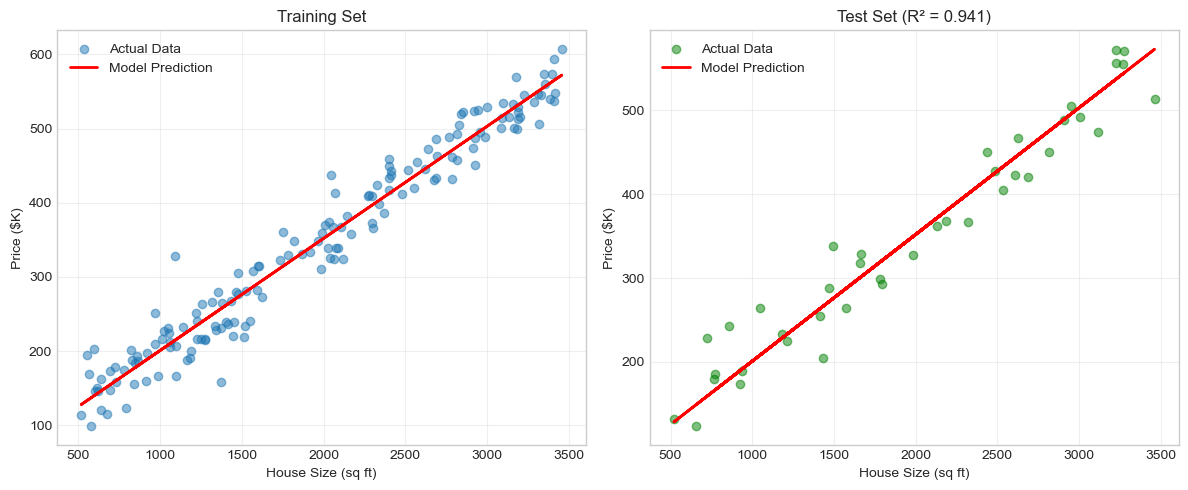

In [43]:
# Visualize model fit
plt.figure(figsize=(12, 5))

# Plot 1: Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5, label='Actual Data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Model Prediction')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($K)')
plt.title('Training Set')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, color='green', label='Actual Data')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Model Prediction')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($K)')
plt.title(f'Test Set (R² = {test_metrics["r2"]:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The red line shows our model's learned relationship. Similar performance on train and test sets indicates good generalization.

---

## Key Scikit-Learn Concepts Summary

### 1. Consistent API Pattern

All scikit-learn estimators follow the same interface:

```python
# Classification example
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Regression example  
from sklearn.linear_model import Ridge
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
```

**Key Methods:**
- `.fit(X, y)` - Train the model
- `.predict(X)` - Make predictions
- `.score(X, y)` - Evaluate performance
- `.get_params()` - View model settings
- `.set_params()` - Change model settings

### 2. Data Preprocessing

**Common preprocessing steps:**

```python
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Encoding categories
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
```

### 3. Model Evaluation

**Train-Test Split:**
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```

**Cross-Validation:**
```python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
```

### 4. Hyperparameter Tuning

**Grid Search:**
```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
```

### 5. Pipelines

Chain preprocessing and modeling steps:

```python
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
```

---

## Best Practices Checklist

✅ **Always split data** into train/test sets  
✅ **Preprocess consistently** using `.fit_transform()` on train, `.transform()` on test  
✅ **Use cross-validation** for reliable performance estimates  
✅ **Scale features** when using distance-based algorithms  
✅ **Set random_state** for reproducible results  
✅ **Check for data leakage** - never train on test data  
✅ **Monitor overfitting** - compare train vs test performance  
✅ **Use pipelines** to avoid preprocessing errors  

---

## Next Steps

Now that you understand the basics, explore:

1. **Classification algorithms**: LogisticRegression, SVM, RandomForest
2. **Clustering**: KMeans, DBSCAN, Hierarchical
3. **Dimensionality reduction**: PCA, t-SNE
4. **Feature selection**: SelectKBest, RFE
5. **Ensemble methods**: Bagging, Boosting, Stacking

**Additional Resources:**
- Official docs: https://scikit-learn.org/stable/
- Tutorials: https://scikit-learn.org/stable/tutorial/index.html
- User guide: https://scikit-learn.org/stable/user_guide.html